#### **Imports**

In [201]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import AutoMinorLocator

colors = ['crimson','midnightblue', 'magenta','orange','springgreen','dodgerblue','darkviolet', 'olive','tomato']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

#### **Problem 3**

In [202]:
island_size = 5 # Radius

##### **Problem 3a**

In [203]:
def is_inside_circle(x, y, radius=island_size):
    return x**2 + y**2 < radius**2

import numpy as np

def comp_distance_to_edge(x, y, direction, island_size):
    ''' This is a function used to find the distance from a crab's position
        to the edge of the circle. To be used in the case where a crab nears
        the island's edge '''
    dx = np.cos(direction)
    dy = np.sin(direction)
    
    A = dx**2 + dy**2
    B = 2 * (x * dx + y * dy)
    C = x**2 + y**2 - island_size**2
    
    discriminant = B**2 - 4 * A * C
    if discriminant >= 0:
        sqrt_discriminant = np.sqrt(discriminant)
        t1 = (-B - sqrt_discriminant) / (2 * A)
        t2 = (-B + sqrt_discriminant) / (2 * A)
        
        t = min(filter(lambda t: t >= 0, [t1, t2]), default=0)
        return t

def move_crab(x,y): # Simulate a single day's step of a crab
    
    direction = np.random.uniform(0,2*np.pi) # Get a random direction

    x_change = 0.2 * np.cos(direction)
    y_change = 0.2 * np.sin(direction)

    if is_inside_circle(x+x_change,y+y_change): # Check if it is still inside the circle
        return x+x_change,y+y_change # Update position
    
    else: # If not, then compute distance to the edge and use that distance
        distance_to_edge = comp_distance_to_edge(x=x,y=y,direction=direction,island_size=island_size)
        
        x_change = distance_to_edge * np.cos(direction)
        y_change = distance_to_edge * np.sin(direction)
        
        return x+x_change,y+y_change # Update position with shorter distance

In [204]:
x , y = 3.6 , -2 # Generate crab initial position

days = 200

x_coords , y_coords = [3.6] , [-2]

for day in range(days):
    x , y = move_crab(x,y)
    x_coords.append(x)
    y_coords.append(y)

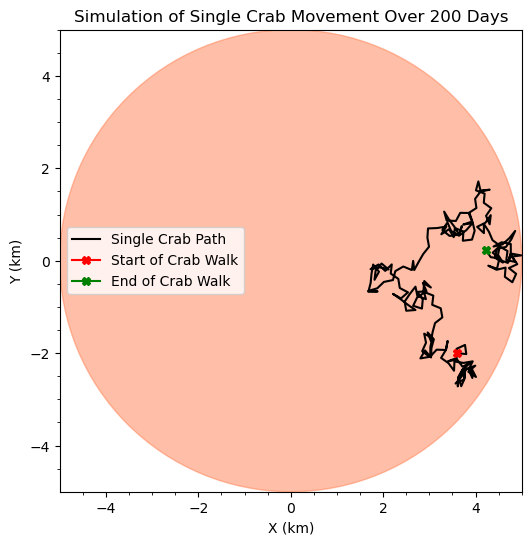

In [205]:
island = plt.Circle((0, 0), island_size, color='coral', alpha=0.5)
fig, ax = plt.subplots(figsize=(6,6))
ax.add_artist(island)
ax.plot(x_coords, y_coords, color='k',linestyle='-', label='Single Crab Path')
ax.plot(x_coords[0],y_coords[0],color='red',marker='X',label='Start of Crab Walk')
ax.plot(x_coords[-1],y_coords[-1],color='green',marker='X',label='End of Crab Walk')
ax = plt.gca()
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.tick_params(which='minor', length=2, color='k')
ax.set_xlim(-island_size, island_size)
ax.set_ylim(-island_size, island_size)
ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
ax.set_title('Simulation of Single Crab Movement Over 200 Days')
ax.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

##### **Problem 3b**

In [206]:
def modified_move_crab(x,y):
    
    direction = np.random.uniform(0,2*np.pi) # Get a random direction

    x_change = 0.2 * np.cos(direction)
    y_change = 0.2 * np.sin(direction)

    if is_inside_circle(x+x_change,y+y_change): # Check if it is still inside the circle
        distance = np.sqrt(x_change**2 + y_change**2) # Compute the distance as well
        return x+x_change,y+y_change,distance,0 # Raise a 0 if no edge 
    
    else: # If not, then compute distance to the edge and use that distance
        
        distance_to_edge = comp_distance_to_edge(x=x,y=y,direction=direction,island_size=island_size)
        
        x_change = distance_to_edge * np.cos(direction)
        y_change = distance_to_edge * np.sin(direction)
        
        distance = np.sqrt(x_change**2 + y_change**2) # Compute the distance as well
        
        return x+x_change,y+y_change,distance,1 # Raise a 1 if an edge was encountered

In [207]:
list_of_runs = []

pseudo_experiments = 501

for experiment in range(pseudo_experiments):
    
    x , y = 3.6 , -2 # Generate crab initial position

    days = 10000 # Set the days to something large

    x_coords , y_coords , distances = [3.6] , [-2] , [] 

    for day in range(days): 
        x , y , distance, edge = modified_move_crab(x,y)
        if edge == 0:
            x_coords.append(x)
            y_coords.append(y)
            distances.append(distance) # Get the distance
        else: break
        
    list_of_runs.append(np.sum(distances))

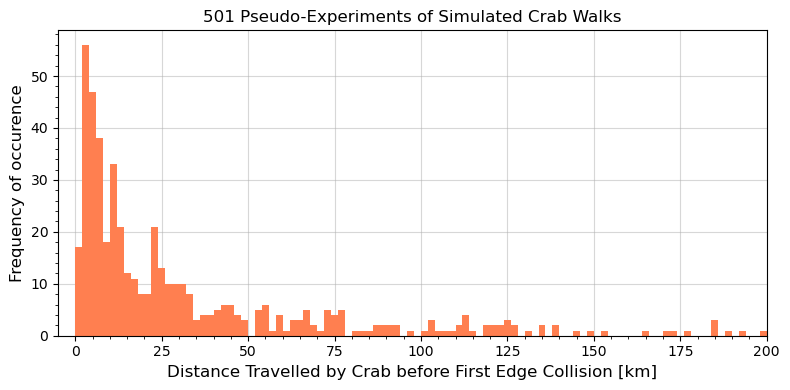

In [208]:
plt.figure(figsize = (8,4))

plt.hist(list_of_runs,bins=np.arange(0,201.,2),density=False,color='coral')

ax = plt.gca() # For setting sub-ticks
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.tick_params(which='minor', length=2, color='k')

plt.title('501 Pseudo-Experiments of Simulated Crab Walks',fontsize=12)
plt.xlabel('Distance Travelled by Crab before First Edge Collision [km]',fontsize=12)
plt.ylabel('Frequency of occurence',fontsize=12)
plt.xlim(-5,200)
plt.grid(True,alpha=0.5,zorder=0)
ax.set_axisbelow(True)
plt.tight_layout()

##### **Problem 3c**

In [209]:
crab_death_radius = 0.175 # Set the radius of a crab fighting another crab
total_crab_mass = 20. # Total mass of all crabs in kg 

def win_crab_duel(mass_1,mass_2): # Function for checking if a duel is won
    probability_of_crab1_win = mass_1**2 / (mass_1**2 + mass_2**2)
    random_probability = np.random.uniform(0,1)
    
    if probability_of_crab1_win > random_probability:
       return True 
    else: False

In [210]:
df_crab_original = pd.read_csv('CrabStartPositions.txt', sep='\s+',header=None)
df_crab_original.columns = ['X','Y'] # Set column names
df_crab_original['Alive'] = 1 # Set all crabs to being alive
df_crab_original['Mass']  = 1 # Set the mass of all crabs to 1

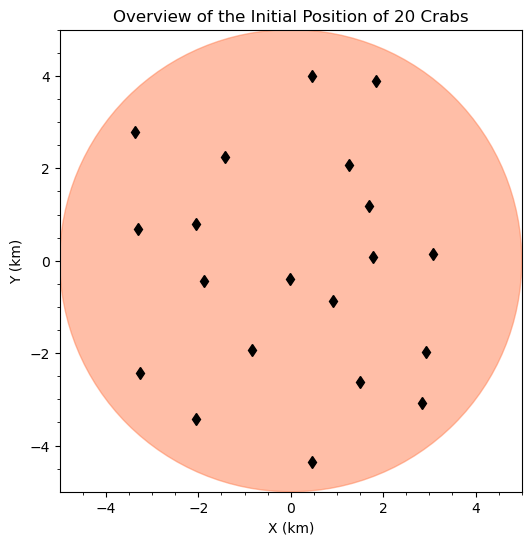

In [211]:
island = plt.Circle((0, 0), island_size, color='coral', alpha=0.5)
fig, ax = plt.subplots(figsize=(6,6))
ax.add_artist(island)
ax.plot(df_crab_original['X'],df_crab_original['Y'], color='k',marker='d',linestyle='')
ax = plt.gca()
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.tick_params(which='minor', length=2, color='k')
ax.set_xlim(-island_size, island_size)
ax.set_ylim(-island_size, island_size)
ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
ax.set_title('Overview of the Initial Position of 20 Crabs')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [212]:
### Parameters of run
days = 200
pseudo_experiments = 2000

In [213]:
df_crab = df_crab_original.copy()

for index , row in df_crab.iterrows(): # Move every crab
    crab_move_x , crab_move_y = move_crab(row['X'] , row['Y'])
    df_crab.loc[index, 'X'] = crab_move_x
    df_crab.loc[index, 'Y'] = crab_move_y

In [214]:
for index_1 , crab_1 in df_crab.iterrows(): # Loop over every crab
    
    crab_x_1 , crab_y_1 = crab_1['X'] , crab_1['Y']
    
    for index_2 , crab_2 in df_crab.iterrows(): # Check other crabs
        
        if index_1 != index_2: # Prevent a crab from checking itself
            
            crab_x_2 , crab_y_2 = crab_2['X'] , crab_2['Y']
            
            inter_crab_distance = np.sqrt((crab_y_2-crab_y_1)**2 + (crab_x_2-crab_x_1)**2) # Compute distance 
            
            if inter_crab_distance <= 0.175: # Check distance between crabs
                if win_crab_duel(crab_1['Mass'],crab_2['Mass']): # Check if crab 1 wins over crab 2
                    df_crab.loc[index_1, 'Mass'] += crab_2['Mass'] # Add mass to crab 1
                    df_crab = df_crab.drop(index_2) # Remove the losing crab from the dataframe

In [218]:
df_crab = df_crab_original.copy() # Make a copy of the original df

for day in range(days):
    
    for index , row in df_crab.iterrows(): # Move every crab
        crab_move_x , crab_move_y = move_crab(row['X'] , row['Y'])
        df_crab.loc[index, 'X'] = crab_move_x
        df_crab.loc[index, 'Y'] = crab_move_y
        
    for index_1 , crab_1 in df_crab.iterrows(): # Loop over every crab
        
        crab_x_1 , crab_y_1 = crab_1['X'] , crab_1['Y']
        
        for index_2 , crab_2 in df_crab.iterrows(): # Check other crabs
            
            if index_1 != index_2: # Prevent a crab from checking itself
                
                crab_x_2 , crab_y_2 = crab_2['X'] , crab_2['Y']
                
                inter_crab_distance = np.sqrt((crab_y_2-crab_y_1)**2 + (crab_x_2-crab_x_1)**2) # Compute distance 
                
                if inter_crab_distance <= 0.175: # Check distance between crabs
                    if crab_1['Alive']==1 and crab_2['Alive']==1:
                        if win_crab_duel(crab_1['Mass'],crab_2['Mass']): # Check if crab 1 wins over crab 2
                            crab_2_mass = crab_2['Mass'] # Create temporary mass
                            df_crab.loc[index_1, 'Mass'] += crab_2_mass # Add mass to crab 1
                            df_crab.loc[index_2, 'Alive'] -= 1 # Kill the other crab
                            df_crab.loc[index_2, 'Mass'] -= crab_2_mass # Kill the other crab